<h3 text align='center';> ISAT 341: Data Science and Machine Learning
<br>
Activity 8: Model Evaluation and Confusion Matrices
  
   
 <h2 text align='center'> (Classifier: Support Vector Machines) </h2>

<img src="images/confusion_matrix.png" width=350; height=350>  


<u>Objectives</u>

- Create a professional looking Jupyter Notebook
- Download the Iris flower dataset form the UCI Machine Learning Repository
- Use Pandas and Pandas Dataframes to Import and Save Data
- Data Preprocessing: Use subset of Iris flower dataset for binary classification
- Use Numpy to encode the categorical class labels into integer class labels
- Perform Decision Boundary Plotting with MatPlotLib
- Use Support Vector Classifier on Iris Flower Subset
- Create Classification Report for Recal1, Precision and F1-Score
- Perform Model Evaluation with Classification Report Confusion Matrix
- Use Scikit-Learn built-in Label Encoder

### Loading the Iris flower Dataset

In [1]:
# Load the iris flower dataset from the UCI Machine Learning Repository into a Pandas Dataframe
import pandas as pd 

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data', header= None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Loading (and saving) the Iris flower dataset

In [2]:
# Load the iris flower dataset from the UCI Machine Learning Repository into a Pandas Dataframe

# Load CSV using Pandas from URL 
import pandas 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class']
iris_df = pandas.read_csv(url, names=names)
# print shape and last five rows 
print(iris_df.shape)
iris_df.tail()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
# Save the iris flower dataset to a CSV file
# Save the dataset downloaded from the wed 
iris_df.to_csv('iris_flower_dataset.csv', index=False)

In [4]:
# Reload the saved data from the CSV file 
iris_df_from_file= pd.read_csv('iris_flower_dataset.csv')
iris_df_from_file.tail()


,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Data Preprocessing
- iloc indexer syntax = data_frame_name.iloc[row selection,column selection]
- Single selections using iloc and DataFrame
    - To Select Rows:
        - data_frame_name.iloc[0] # first row of data frame
        - data_frame_name.iloc[1] # second row of data frame
        - data_frame_name.iloc[-1] # last row of data frame
    - To Select Columns:
        - data_frame_name.iloc[: , 0] # first column of data frame
        - data_frame_name.iloc[: , 1] # second column of data frame
        - data_frame_name.iloc[: , -1] # last column of data frame


In [5]:
# iloc indexer syntax : data_frame_name.iloc[row selection,column selection]
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 

# Select setosa and versicolor
y = df.iloc[0:100,4].values

### Class Label Encoding 


In [6]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [7]:
# Extract sepal length and petal length
X = df.iloc [0:100, [0,2]].values

### Decision Boundary Plotting

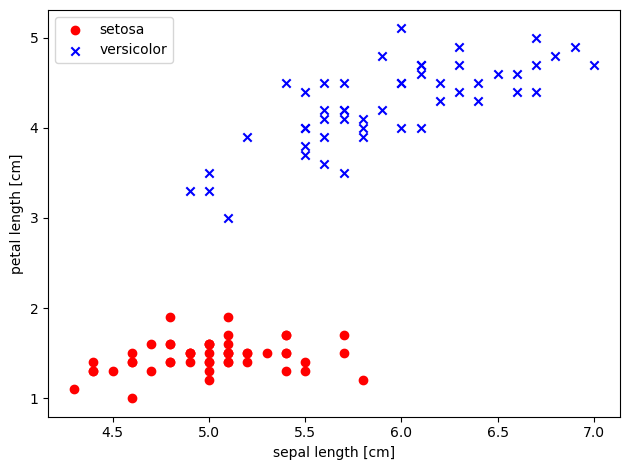

In [8]:
# Plot data 
plt.scatter(X[:50,0], X[:50,1],
           color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100,0], X[50:100,1],
           color = 'blue', marker = 'x', label = 'versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')

plt.tight_layout()
plt.savefig('iris_decision_boundary.png',dpi=300)
plt.show()

### Train/Test Splits of Data

In [9]:
# Splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


### Support Vector Classifier

In [10]:
# Fitting the model using a Linear Support Vector Machine Classifier
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings("ignore")
# Instantiate the model and fit the data 
lsvc=LinearSVC()
lsvc.fit(X_train, y_train)

LinearSVC()

In [11]:
# Let's Evaluate the Support Vector Machine Model 
y_pred = lsvc.predict(X_test)
print("Test set predictions:/n {}".format (y_pred))

Test set predictions:/n [-1  1 -1  1  1  1 -1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1
 -1]


In [12]:
print("Test set score: {0:0.2f}".format(np.mean(y_pred==y_test)))

Test set score: 1.00


In [13]:
print("Test set score: {0:0.2f}".format(lsvc.score(X_test, y_test)))

Test set score: 1.00


### Model Performance Evaluation via the Classification Report and the Confusion Matrix

In [14]:
# Confusion Matrix 
from sklearn import metrics 
print("Confusion Matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[13  0]
 [ 0 12]]


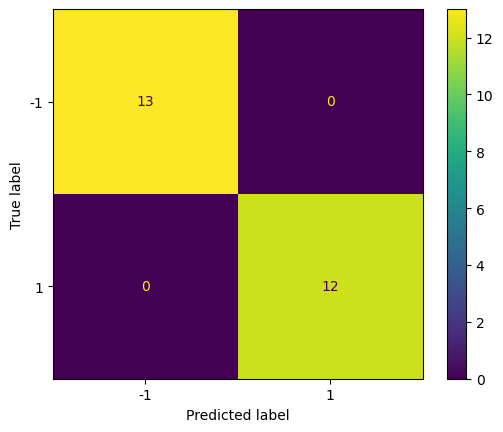

In [15]:
# Confusion Matrix (using ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=lsvc.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lsvc.classes_)
disp.plot()
plt.show()

#### Loading the dataset (the dataset from canvas)


In [16]:
# Load the iris flower dataset from a text file
import pandas as pd 
df = pd.read_csv('data/dataset_iris.txt',
                encoding='utf-8',
                comment='#',
                sep=',')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


#### Question 1:

In [17]:
X = df.iloc[:,:4].values
y = df['class'].values
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This code separates the features "X" and target variable "y" to find the unique classes within the target variable "y". 

In [18]:
from sklearn. preprocessing import LabelEncoder
# instantiate label encoder
l_encoder = LabelEncoder()
# Encode the labels 
l_encoder.fit(y)
# Display
l_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Question 2:

The last line of code is what returns the unique classes that have been encoded. 

#### Question 3:

In [19]:
y_enc = l_encoder.transform(y)
np.unique(y_enc)


array([0, 1, 2])

This code is what transforms the target variable "y" and puts it into the LabelEncoder to find the unique values that have been encoded.

#### Question 4:

In [20]:
print(y_enc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The output above is showing how the target variable "y" has been transformed and put into the LabelEncoder, so that each variable has been encoded as an interger now. 

#### Question 5:

In [21]:
np.unique(l_encoder.inverse_transform(y_enc))

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

This code above is what transforms the labels that have been encoded back to their original forms as class labels. Then, it finds the unique class labels based on the NumPy unique function (np.unique).